# ANLY-590 Assignment 3

## 1. Autoencoder

In [0]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.datasets import fashion_mnist

In [0]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [0]:
x_train = x_train.reshape([-1,28,28,1]) / 255.0
x_test = x_test.reshape([-1,28,28,1]) / 255.0

In [0]:
x_train_resn = np.stack((x_train, x_train, x_train), axis=0)
x_train_resn = x_train_resn.reshape([-1,28,28,3])
x_test_resn = np.stack((x_test, x_test, x_test), axis=0)
x_test_resn = x_test_resn.reshape([-1,28,28,3])
print(x_train_resn.shape)
print(x_test_resn.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [0]:
def padding_for_resnet(X, Y, list_of_images):
  desiredX = X
  desiredY = Y
  padded_images = []
  for img in list_of_images:
      shape = img.shape
      xDiff = desiredX - shape[0]
      xLeft = xDiff//2
      xRight = xDiff-xLeft

      yDiff = desiredY - shape[1]
      yLeft = yDiff//2
      yRight = yDiff - yLeft

      padded_images.append(np.pad(img,((xLeft,xRight),(yLeft,yRight),(0,0)), mode='constant'))
          #or choose another mode

  padded_images = np.asarray(padded_images)
  return padded_images

In [0]:
x_train_resn = padding_for_resnet(32, 32, x_train_resn)
x_test_resn = padding_for_resnet(32, 32, x_test_resn)
print(x_train_resn.shape)
print(x_test_resn.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
x_train_resn = np.stack((x_train, x_train, x_train), axis=0)
x_train_resn = x_train_resn.reshape([-1,32,32,3])
x_test_resn = np.stack((x_test, x_test, x_test), axis=0)
x_test_resn = x_test_resn.reshape([-1,32,32,3])
print(x_train_resn.shape)
print(x_test_resn.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [0]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (5, 5), activation='relu', padding='same')(input_img)
x = MaxPooling2D((4, 4), padding='same')(x)
# 28，28 => 7,7
x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)
# 7,7 => 4,4


x = Conv2D(16, (2, 2), activation='relu', padding='same')(encoded)
x = UpSampling2D((4, 4))(x)
# 4,4 => 16,16
x = Conv2D(32, (3, 3), activation='relu')(x)
# 16,16 => 14,14
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (4, 4), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 7, 7, 16)          2064      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 16)          1040      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 16, 16, 16)        0   

In [0]:
autoencoder.fit(x_train, x_train,
                epochs=30,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                )

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 101us/step - loss: 0.3970 - val_loss: 0.3233
Epoch 2/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.3121 - val_loss: 0.3077
Epoch 3/30
60000/60000 [==============================] - 5s 92us/step - loss: 0.3012 - val_loss: 0.3001
Epoch 4/30
60000/60000 [==============================] - 6s 92us/step - loss: 0.2959 - val_loss: 0.2963
Epoch 5/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.2928 - val_loss: 0.2938
Epoch 6/30
60000/60000 [==============================] - 5s 92us/step - loss: 0.2907 - val_loss: 0.2918
Epoch 7/30
60000/60000 [==============================] - 5s 92us/step - loss: 0.2888 - val_loss: 0.2904
Epoch 8/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.2873 - val_loss: 0.2888
Epoch 9/30
60000/60000 [==============================] - 5s 91us/step - loss: 0.2861 - val_loss: 0.2877
Epoc

In [0]:
from google.colab import drive
drive.mount('/content/drive')
autoencoder.save('/content/drive/My Drive/autoencoder.h5')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


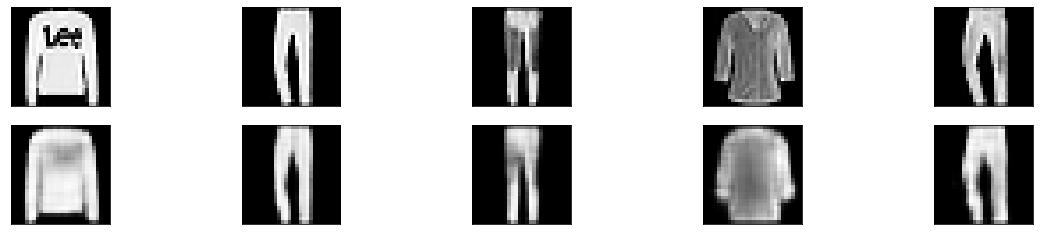

In [0]:
decoded_imgs = autoencoder.predict(x_test)

n = 5
plt.figure(figsize=(20, 4))
for i in range(1,n+1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2. Image Classification

### 2.1 Deep CNN

In [0]:
CNN_model = keras.Sequential([
    #(-1,28,28,1)->(-1,28,28,32)
    keras.layers.Conv2D(input_shape=(28, 28, 1),filters=32,kernel_size=5,strides=1,padding='same',activation='relu'),     # Padding method),
    #(-1,28,28,32)->(-1,14,14,32)
    keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'),
    keras.layers.Dropout(0.2),
    #(-1,14,14,32)->(-1,14,14,64)
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'),     # Padding method),
    #(-1,14,14,64)->(-1,7,7,64)
    keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'),
    keras.layers.Dropout(0.2),
    #(-1,7,7,64)->(-1,4,4,64)
    keras.layers.Conv2D(filters=64,kernel_size=3,strides=1,padding='same',activation='relu'),
    #(-1,7,7,64)->(-1,7,7,64)
    keras.layers.MaxPool2D(pool_size=2,strides=2,padding='same'),
    keras.layers.Dropout(0.2),
    #(-1,7,7,64)->(-1,4,4,64)
    keras.layers.Flatten(),
    #(-1,4*4*64)->(-1,256)
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    #(-1,256)->(-1,128)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    #(-1,128)->(-1,10)
    keras.layers.Dense(10, activation='softmax')
])

print(CNN_model.summary())


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
____

In [0]:
CNN_model.compile(optimizer='adam',
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [0]:
CNN_model.fit(x_train, y_train, 
      batch_size = 256,
      epochs = 50,
      validation_data=[x_test[:1000],y_test[:1000]])

Train on 60000 samples, validate on 1000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 104us/step - loss: 0.7730 - acc: 0.7115 - val_loss: 0.4582 - val_acc: 0.8380
Epoch 2/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.4461 - acc: 0.8377 - val_loss: 0.3567 - val_acc: 0.8760
Epoch 3/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3780 - acc: 0.8623 - val_loss: 0.3352 - val_acc: 0.8860
Epoch 4/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.3392 - acc: 0.8760 - val_loss: 0.3089 - val_acc: 0.8890
Epoch 5/50
60000/60000 [==============================] - 5s 89us/step - loss: 0.3153 - acc: 0.8849 - val_loss: 0.2831 - val_acc: 0.9010
Epoch 6/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2983 - acc: 0.8897 - val_loss: 0.2779 - val_acc: 0.8980
Epoch 7/50
60000/60000 [==============================] - 5s 88us/step - loss: 0.2854 - acc: 0.8948 - val_loss: 0.2599 - val_acc

In [0]:
CNN_model.save('/content/drive/My Drive/CNN_model_image.h5')

In [0]:
print(CNN_model.evaluate(x_test, y_test))

10000/10000 [==============================] - 1s 101us/step
[0.22765866214632988, 0.9267]


### 2.2 Transfer Learning

In [0]:
ResNet = keras.applications.resnet.ResNet50(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=10)
ResNet.trainable = False
ResNet_model = keras.Sequential([
        ResNet,
        keras.layers.Flatten(),
        keras.layers.Dense(512, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])
print(ResNet_model.summary())


94773248/94765736 [==============================] - 7s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 1, 1, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________
None


In [0]:
VGG = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3), classes=10)
VGG.trainable = False
VGG_model = keras.Sequential([
        VGG,
        keras.layers.Flatten(),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
])
print(VGG_model.summary())

58892288/58889256 [==============================] - 5s 0us/step
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 14,848,586
Trainable params: 133,898
Non-trainable params: 14,714,688
_________________________________________________________________
None


In [0]:
opt = keras.optimizers.adam(lr=0.001)
ResNet_model.compile(optimizer=opt,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])
VGG_model.compile(optimizer=opt,
      loss='sparse_categorical_crossentropy',
      metrics=['accuracy'])

In [0]:
print(x_train_resn.shape)

(60000, 28, 28, 3)


In [0]:
print('--------Training ResNet--------')
ResNet_model.fit(x_train_resn, y_train, 
      batch_size = 32,
      epochs = 10,
      validation_data=[x_test_resn[:1000],y_test[:1000]])
print('--------Training VGG--------')
VGG_model.fit(x_train_resn, y_train, 
      batch_size = 32,
      epochs = 10,
      validation_data=[x_test_resn[:1000],y_test[:1000]])

--------Training ResNet--------
Train on 60000 samples, validate on 1000 samples
Epoch 1/10
60000/60000 [==============================] - 58s 962us/step - loss: 2.2784 - acc: 0.1228 - val_loss: 2.3028 - val_acc: 0.1070
Epoch 2/10
60000/60000 [==============================] - 58s 959us/step - loss: 2.2741 - acc: 0.1221 - val_loss: 2.3026 - val_acc: 0.0990
Epoch 3/10
60000/60000 [==============================] - 57s 958us/step - loss: 2.2713 - acc: 0.1238 - val_loss: 2.3027 - val_acc: 0.0870
Epoch 4/10
60000/60000 [==============================] - 58s 959us/step - loss: 2.2694 - acc: 0.1234 - val_loss: 2.3030 - val_acc: 0.0930
Epoch 5/10
60000/60000 [==============================] - 57s 958us/step - loss: 2.2681 - acc: 0.1230 - val_loss: 2.3037 - val_acc: 0.1020
Epoch 6/10
60000/60000 [==============================] - 57s 957us/step - loss: 2.2655 - acc: 0.1248 - val_loss: 2.3025 - val_acc: 0.0950
Epoch 7/10
60000/60000 [==============================] - 57s 958us/step - loss: 2.26

In [0]:
ResNet_model.save('/content/drive/My Drive/ResNet_model.h5')
VGG_model.save('/content/drive/My Drive/VGG_model.h5')

## 3. Text Classification

### 3.1 RNN

In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('tweets_with_labels.csv', header = 0, sep='\t')
print(data.head())

   id                                              tweet   k1  ...    k13  k14  k15
0   1                Jazz for a Rainy Afternoon:  {link}  0.0  ...  0.000  0.0  0.0
1   2                   RT: @mention: I love rainy days.  0.0  ...  0.000  0.0  0.0
2   3  Good Morning Chicago! Time to kick the Windy C...  0.0  ...  0.000  0.0  0.0
3   6  Preach lol! :) RT @mention: #alliwantis this t...  0.0  ...  0.201  0.0  0.0
4   9                     @mention good morning sunshine  0.0  ...  1.000  0.0  0.0

[5 rows x 17 columns]


In [0]:
print(data.shape)
train_data = data[:77000]
test_data = data[77000:77946]
print(test_data.shape)
print(train_data.shape)

(77946, 17)
(946, 17)
(77000, 17)


In [0]:
def data_formatting(data):
  maxlen = int(data.__len__())
  res = []
  temp = []
  labels = []
  # print(maxlen)
  print('-----Formatting data-----')
  for k in range(maxlen):
    for attr in data.iloc[k]:
      temp.append(attr)
    labels = temp[2:17]
    res.append([temp[1],labels])
    temp = []
  print('-----Complete!-----')
  return res

In [0]:
train_data = data_formatting(train_data)
test_data = data_formatting(test_data)

-----Formatting data-----
-----Complete!-----
-----Formatting data-----
-----Complete!-----


In [0]:
print(train_data[:5])
print(test_data[:5])

[['Jazz for a Rainy Afternoon:  {link}', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], ['RT: @mention: I love rainy days.', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]], ['Good Morning Chicago! Time to kick the Windy City in the nuts and head back West!', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]], ['Preach lol! :) RT @mention: #alliwantis this type of weather all the time.. I live for beautiful days like this! #minneapolis', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.604, 0.0, 0.196, 0.0, 0.0, 0.0, 0.201, 0.0, 0.0]], ['@mention good morning sunshine', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]]]
[['Never seen a rainy day look this bright', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.389, 0.0, 0.0]], ['RT @mention: #childhoodmemories tha city b4 tha storm', [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]], ['#WEATHER:  8

In [0]:
import nltk
nltk.download('punkt')
print('Tokenizeing...')
print('\n')

def tokenize(data):
    res = []
    for samples in data:
        # nltk.word_tokenize用于取tokens
        temp_t = nltk.word_tokenize(samples[0])
        res.append([temp_t, samples[1]])
    return res


train_data = tokenize(train_data)
test_data = tokenize(test_data)
print(train_data[0])
print(test_data[0])
print('\n')
print('Tokenization completed!')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
Tokenizeing...


[['Jazz', 'for', 'a', 'Rainy', 'Afternoon', ':', '{', 'link', '}'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[['Never', 'seen', 'a', 'rainy', 'day', 'look', 'this', 'bright'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.389, 0.0, 0.0]]


Tokenization completed!


In [0]:
def lower_case(data):
  print('-----Converting to lowercases-----')
  res = []
  temp_words = []
  for samples in data:
    for words in samples[0]:
      temp_words.append(words.lower())
    res.append([temp_words, samples[1]])
    temp_words = []
  print('-----Complete!-----')
  return res

In [0]:
def join_split_word(data):
  # tokens => ''.join
  # chars => split
  # res.appned([chars, labels])
  res = []
  temp_res = []
  temp_chars = []
  for aas in data:
      temp_res.append([aas[0], aas[1]])

  for aaas in temp_res:
      temp_ff = ''.join(aaas[0])
      for words in temp_ff:
        temp_chars.append(words)
      res.append([temp_chars, aaas[1]])
      temp_chars = []
  return res

In [0]:
train_data_RNN = lower_case(train_data)
test_data_RNN = lower_case(test_data)
print(train_data_RNN[0])
print(test_data_RNN[0])

-----Converting to lowercases-----
-----Complete!-----
-----Converting to lowercases-----
-----Complete!-----
[['jazz', 'for', 'a', 'rainy', 'afternoon', ':', '{', 'link', '}'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[['never', 'seen', 'a', 'rainy', 'day', 'look', 'this', 'bright'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.389, 0.0, 0.0]]


In [0]:
train_data_CNN = join_split_word(train_data_RNN)
test_data_CNN = join_split_word(test_data_RNN)
print(train_data_CNN[0])
print(test_data_CNN[0])

[['j', 'a', 'z', 'z', 'f', 'o', 'r', 'a', 'r', 'a', 'i', 'n', 'y', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', ':', '{', 'l', 'i', 'n', 'k', '}'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[['n', 'e', 'v', 'e', 'r', 's', 'e', 'e', 'n', 'a', 'r', 'a', 'i', 'n', 'y', 'd', 'a', 'y', 'l', 'o', 'o', 'k', 't', 'h', 'i', 's', 'b', 'r', 'i', 'g', 'h', 't'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.389, 0.0, 0.0]]


In [0]:
# cacluating maxlen
def maxlen_cal(data):
  print('-----Cacluating maxlen-----')
  maxlen = 0
  for samples in data:
    temp = len(samples[0])
    if temp >= maxlen:
      maxlen = temp
  print('-----Complete!-----')
  return maxlen

In [0]:
print(maxlen_cal(train_data_RNN))
print(maxlen_cal(test_data_RNN))

-----Cacluating maxlen-----
-----Complete!-----
77
-----Cacluating maxlen-----
-----Complete!-----
44


In [0]:
print(maxlen_cal(train_data_CNN))
print(maxlen_cal(test_data_CNN))

-----Cacluating maxlen-----
-----Complete!-----
158
-----Cacluating maxlen-----
-----Complete!-----
134


In [0]:
maxlen_RNN = 80
maxlen_CNN = 160

In [0]:
def padding_len(data, maxlen):
  print('-----Padding for dataset-----')
  maxlen = maxlen
  res = []
  for samples in data:
    temp_len = len(samples[0])
    for k in range(maxlen - temp_len):
      samples[0].append('.')
    res.append([samples[0], samples[1]])
  print('-----Complete!-----')
  return res

In [0]:
train_data_RNN = padding_len(train_data_RNN, 80)
test_data_RNN = padding_len(test_data_RNN, 80)
print(maxlen_cal(train_data_RNN))
print(maxlen_cal(test_data_RNN))
print(train_data_RNN[0])
print(test_data_RNN[0])

-----Padding for dataset-----
-----Complete!-----
-----Padding for dataset-----
-----Complete!-----
-----Cacluating maxlen-----
-----Complete!-----
80
-----Cacluating maxlen-----
-----Complete!-----
80
[['jazz', 'for', 'a', 'rainy', 'afternoon', ':', '{', 'link', '}', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
[['never', 'seen', 'a', 'rainy', 'day', 'look', 'this', 'bright', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.

In [0]:
train_data_CNN = padding_len(train_data_CNN, 160)
test_data_CNN = padding_len(test_data_CNN, 160)
print(maxlen_cal(train_data_CNN))
print(maxlen_cal(test_data_CNN))
print(train_data_CNN[0])
print(test_data_CNN[0])

-----Padding for dataset-----
-----Complete!-----
-----Padding for dataset-----
-----Complete!-----
-----Cacluating maxlen-----
-----Complete!-----
160
-----Cacluating maxlen-----
-----Complete!-----
160
[['j', 'a', 'z', 'z', 'f', 'o', 'r', 'a', 'r', 'a', 'i', 'n', 'y', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', ':', '{', 'l', 'i', 'n', 'k', '}', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.',

In [0]:
def corpus_labels_gathering(data):
  corpus_res = []
  labels_res = []
  for samples in data:
    corpus_res.append(samples[0])
    labels_res.append(samples[1])
  
  return corpus_res, labels_res

In [0]:
x_train_RNN, y_train_RNN = corpus_labels_gathering(train_data_RNN)
x_test_RNN, y_test_RNN = corpus_labels_gathering(test_data_RNN)
y_train_RNN = np.array(y_train_RNN)
y_test_RNN = np.array(y_test_RNN)
print(len(x_train_RNN), y_train_RNN.shape)
print(len(x_test_RNN), y_test_RNN.shape)
print(x_train_RNN[0])
print(y_train_RNN[0])
print(x_test_RNN[0])
print(y_test_RNN[0])

77000 (77000, 15)
946 (946, 15)
['jazz', 'for', 'a', 'rainy', 'afternoon', ':', '{', 'link', '}', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['never', 'seen', 'a', 'rainy', 'day', 'look', 'this', 'bright', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
[0.    0.    0.    0.    0.    0.    0.    0.    0.    1.    0.    0.
 0.38

In [0]:
x_train_CNN, y_train_CNN = corpus_labels_gathering(train_data_CNN)
x_test_CNN, y_test_CNN = corpus_labels_gathering(test_data_CNN)
y_train_CNN = np.array(y_train_CNN)
y_test_CNN = np.array(y_test_CNN)
print(len(x_train_CNN), y_train_CNN.shape)
print(len(x_test_CNN), y_test_CNN.shape)
print(x_train_CNN[0])
print(y_train_CNN[0])
print(x_test_CNN[0])
print(y_test_CNN[0])

77000 (77000, 15)
946 (946, 15)
['j', 'a', 'z', 'z', 'f', 'o', 'r', 'a', 'r', 'a', 'i', 'n', 'y', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'o', 'n', ':', '{', 'l', 'i', 'n', 'k', '}', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
['n', 'e', 'v', 'e', 'r', 's', 'e', 'e', 'n', 'a', 'r', 'a', 'i', 'n', 'y', 'd', 'a', 'y', 'l', 'o', 'o', 'k', 't', 'h',

In [0]:
import os
glove_dir = os.path.join('/content/drive/', 'My Drive')

# Dictionary where we store the word:vector_embedding map
embeddings_index_RNN = {}
word_index_RNN = {}
count_RNN=0

# Setting up embedding array
f = open(os.path.join(glove_dir, 'glove.twitter.27B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float64')
    if coefs.shape[0] != 50:
      continue
    # Embeddings is a dictionary of words:word_vector_embeddings
    embeddings_index_RNN[word] = coefs
    word_index_RNN[word] = count_RNN
    count_RNN+=1
f.close()
print('Found {} word vectors.'.format(len(embeddings_index_RNN)))

Found 1193513 word vectors.


In [0]:
print('Our word index dictionary is given by: (word, index), a sample 10 entries are:')
list(word_index_RNN.items())[:10]

Our word index dictionary is given by: (word, index), a sample 10 entries are:


[('<user>', 0),
 ('.', 1),
 (':', 2),
 ('rt', 3),
 (',', 4),
 ('<repeat>', 5),
 ('<hashtag>', 6),
 ('<number>', 7),
 ('<url>', 8),
 ('!', 9)]

In [0]:
word_index_RNN['jazz']

7374

In [0]:
embeddings_index_RNN['jazz']

array([-0.25045  ,  0.10892  ,  0.43621  , -0.60809  ,  0.54129  ,
        0.92997  ,  0.99269  ,  0.3475   ,  0.13757  , -0.59924  ,
       -0.37421  ,  0.84258  , -2.4057   , -0.043693 ,  0.59149  ,
       -0.73741  , -0.025571 ,  0.30033  ,  0.021548 ,  0.55332  ,
       -0.5839   ,  0.49692  , -0.45579  , -0.88083  ,  0.40674  ,
       -0.52474  ,  0.20195  ,  0.15264  , -0.095298 , -0.45295  ,
        0.65528  , -0.47579  , -0.076066 ,  0.24585  ,  0.706    ,
        0.01379  ,  0.25097  , -0.47967  ,  0.67772  ,  0.90564  ,
       -1.0681   ,  0.4148   , -0.62683  ,  0.23155  , -0.50809  ,
        0.87655  , -0.15641  , -0.13796  ,  0.0063501, -0.3261   ])

In [0]:
def ofv_vec_gathering(embedding_dim):
  res = np.zeros(shape=embedding_dim)
  return res

In [0]:
embedding_dim = 50
ofv = 'out-of-vocabulary'
ofv_vec = ofv_vec_gathering(embedding_dim)

In [0]:
embeddings_index_RNN[ofv] = ofv_vec
word_index_RNN[ofv] = count_RNN + 1
count_RNN += 1
print('Found {} word vectors.'.format(len(embeddings_index_RNN)))

Found 1193514 word vectors.


In [0]:
# --- Preprocessing the GloVe word-embeddings matrix --
max_words = count_RNN
# Instantiating a 10000 x 100 matrix 
# embedding_matrix = (number_words, dim_embedding)
embedding_matrix_RNN = np.zeros((max_words, embedding_dim))
for word, i in word_index_RNN.items():
    # Make sure that we are not exceeding the max token size
    if i < max_words:
        # Get the embedded vector for the word
        embedding_vector = embeddings_index_RNN.get(word)
        # Provided that a word is known store it in the 
        # embeddig matrix at position i
        if embedding_vector is not None:
            embedding_matrix_RNN[i] = embedding_vector

In [0]:
print("The size of the word embedding matrix is:" + str(embedding_matrix_RNN.shape))

The size of the word embedding matrix is:(1193514, 50)


In [0]:
RNN_model = keras.models.Sequential([
    keras.layers.Embedding(max_words, embedding_dim, input_length = maxlen_RNN, weights=[embedding_matrix_RNN], trainable=False),
    # keras.layers.SimpleRNN(128, activation='tanh', use_bias=True),
    keras.layers.Bidirectional(keras.layers.GRU(512, activation='tanh', recurrent_activation='sigmoid', use_bias=True)),
    # keras.layers.LSTM(512, activation='tanh', recurrent_activation='sigmoid', use_bias=True),
    # keras.layers.LSTM(512, activation='tanh', recurrent_activation='sigmoid', use_bias=True),
    # keras.layers.GRU(256, activation='tanh', recurrent_activation='sigmoid', use_bias=True),

    # keras.layers.Flatten(),
    # keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    # keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(64, activation='relu'),
    # keras.layers.Dense(32, activation='relu'),
    # keras.layers.Dropout(0.2),
    keras.layers.Dense(15, activation='softmax')
])
print(RNN_model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 80, 50)            59675700  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 1024)              1729536   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 15)               

In [0]:
def data2vec(data):
  res = []
  for samples in data:
    for items in samples:
      if items not in embeddings_index_RNN.keys():
        word_index_RNN[items] = count_RNN
      res.append(word_index_RNN[items])

  res = np.array(res)
  return res

In [0]:
x_train_RNN = data2vec(x_train_RNN)
x_test_RNN = data2vec(x_test_RNN)

In [0]:
x_train_RNN = x_train_RNN.reshape(77000, 80)
x_test_RNN = x_test_RNN.reshape(946, 80)

In [0]:
print(x_train_RNN)
print(x_test_RNN)

[[ 7374    37    11 ...     1     1     1]
 [    3     2   304 ...     1     1     1]
 [  117   344  3607 ...     1     1     1]
 ...
 [  820  2274   614 ...     1     1     1]
 [   10   858 15080 ...     1     1     1]
 [  304   775   752 ...     1     1     1]]
[[    190     807      11 ...       1       1       1]
 [      3     304     775 ...       1       1       1]
 [    506    1393       2 ...       1       1       1]
 ...
 [    343     506 1193514 ...       1       1       1]
 [    304     775     193 ...       1       1       1]
 [   2934  256706   34335 ...       1       1       1]]


In [0]:
print(x_train_RNN.shape)
print(y_train_RNN.shape)
print(x_test_RNN.shape)
print(y_test_RNN.shape)

(77000, 80)
(77000, 15)
(946, 80)
(946, 15)


In [0]:
opt = keras.optimizers.rmsprop(lr=0.001)

In [0]:
RNN_model.compile(optimizer = opt,
              loss = 'categorical_crossentropy',
              metrics=['categorical_accuracy'])
history = RNN_model.fit(x_train_RNN, y_train_RNN,
            epochs = 15,
            batch_size = 128,
            validation_data = [x_test_RNN,y_test_RNN]) 

Train on 77000 samples, validate on 946 samples
Epoch 1/15
77000/77000 [==============================] - 165s 2ms/step - loss: 1.5663 - categorical_accuracy: 0.7015 - val_loss: 1.2304 - val_categorical_accuracy: 0.8087
Epoch 2/15
77000/77000 [==============================] - 161s 2ms/step - loss: 1.2261 - categorical_accuracy: 0.8018 - val_loss: 1.1771 - val_categorical_accuracy: 0.8171
Epoch 3/15
77000/77000 [==============================] - 161s 2ms/step - loss: 1.1765 - categorical_accuracy: 0.8093 - val_loss: 1.1778 - val_categorical_accuracy: 0.8266
Epoch 4/15
77000/77000 [==============================] - 162s 2ms/step - loss: 1.1406 - categorical_accuracy: 0.8145 - val_loss: 1.1522 - val_categorical_accuracy: 0.8203
Epoch 5/15
77000/77000 [==============================] - 161s 2ms/step - loss: 1.1146 - categorical_accuracy: 0.8187 - val_loss: 1.1461 - val_categorical_accuracy: 0.8298
Epoch 6/15
77000/77000 [==============================] - 161s 2ms/step - loss: 1.0912 - cat

In [0]:
RNN_model.save('/content/drive/My Drive/RNN_model.h5')

### 3.2 CNN

In [0]:
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"

In [0]:
embedding_index_CNN = {}
char_index_CNN = {}
count_CNN = 0
embedding_dim = 25

In [0]:
for chars in alphabet:
  embedding_index_CNN[chars] = np.zeros(shape=embedding_dim)
  char_index_CNN[chars] = count_CNN
  count_CNN += 1

In [0]:
print('Found {} word vectors.'.format(len(embedding_index_CNN)))
ukn = 'UKN'
ukn_vec = np.zeros(shape=embedding_dim)

Found 68 word vectors.


In [0]:
print(ukn_vec)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [0]:
embedding_index_CNN[ukn] = ukn_vec
char_index_CNN[ukn] = count_CNN + 1
count_CNN += 1
print('Found {} word vectors.'.format(len(embedding_index_CNN)))
print(count_CNN)

Found 69 word vectors.
69


In [0]:
embedding_matrix_CNN = np.random.rand(count_CNN, embedding_dim)

In [0]:
def chars2vec(data):
  res = []
  for samples in data:
    for chars in samples:
      if chars not in embedding_index_CNN.keys():
        char_index_CNN[chars] = count_CNN
      res.append(char_index_CNN[chars])
  
  res = np.array(res)
  return res

In [0]:
x_train_CNN = chars2vec(x_train_CNN)
x_test_CNN = chars2vec(x_test_CNN)

In [0]:
x_train_CNN = x_train_CNN.reshape(77000, 160)
x_test_CNN = x_test_CNN.reshape(946, 160)

In [0]:
print(x_train_CNN.shape)
print(x_test_CNN.shape)
print(y_train_CNN.shape)
print(y_test_CNN.shape)

(77000, 160)
(946, 160)
(77000, 15)
(946, 15)


In [0]:
filters_num = 256
kernel_size = 7

In [0]:
CNN_model = keras.models.Sequential([
    keras.layers.Embedding(count_CNN, embedding_dim, input_length = maxlen_CNN, weights=[embedding_matrix_CNN], trainable=True),
    keras.layers.Reshape((1, maxlen_CNN, embedding_dim)),
    keras.layers.Conv2D(filters = filters_num, kernel_size=(kernel_size, embedding_dim), padding='valid', activation='relu', data_format='channels_first'),
    # kernel_size = 7
    keras.layers.MaxPool2D(pool_size=(2,1), padding='valid'),
    # shape => (None, 128, 154, 1)
    keras.layers.Reshape((1, 128, 154)),
    keras.layers.Conv2D(filters = filters_num, kernel_size = (5, 154),  padding='valid', activation='relu', data_format='channels_first'),
    # kernel_size = 5
    keras.layers.MaxPool2D(pool_size=(2,1), padding='valid'),
    # shape => (None, 128, 124, 1)
    keras.layers.Reshape((1, 128, 124)),
    keras.layers.Conv2D(filters = filters_num, kernel_size = (3, 124),  padding='valid', activation='relu', data_format='channels_first'),
    # kernel_size = 3
    keras.layers.MaxPool2D(pool_size=(2,1), padding='valid'),
    keras.layers.Flatten(),   
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(15, activation='softmax')
])
print(CNN_model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 160, 25)           1725      
_________________________________________________________________
reshape_1 (Reshape)          (None, 1, 160, 25)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 256, 154, 1)       45056     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 128, 154, 1)       0         
_________________________________________________________________
reshape_2 (Reshape)          (None, 1, 128, 154)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 256, 124, 1)       197376    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 124, 1)      

In [0]:
CNN_model.compile(optimizer='adam',
          loss = 'categorical_crossentropy',
              metrics=['categorical_accuracy'])

In [0]:
history = CNN_model.fit(x_train_CNN, y_train_CNN,
            epochs = 20,
            batch_size = 32,
            validation_data = [x_test_CNN, y_test_CNN]) 

Train on 77000 samples, validate on 946 samples
Epoch 1/20
77000/77000 [==============================] - 67s 871us/step - loss: 2.6326 - categorical_accuracy: 0.2925 - val_loss: 2.5622 - val_categorical_accuracy: 0.2981
Epoch 2/20
77000/77000 [==============================] - 63s 818us/step - loss: 2.3405 - categorical_accuracy: 0.4083 - val_loss: 2.1920 - val_categorical_accuracy: 0.4683
Epoch 3/20
77000/77000 [==============================] - 63s 820us/step - loss: 2.0980 - categorical_accuracy: 0.5229 - val_loss: 1.9934 - val_categorical_accuracy: 0.5433
Epoch 4/20
77000/77000 [==============================] - 63s 818us/step - loss: 1.9401 - categorical_accuracy: 0.5746 - val_loss: 1.8416 - val_categorical_accuracy: 0.6025
Epoch 5/20
77000/77000 [==============================] - 63s 816us/step - loss: 1.8382 - categorical_accuracy: 0.6086 - val_loss: 1.7417 - val_categorical_accuracy: 0.6406
Epoch 6/20
77000/77000 [==============================] - 63s 817us/step - loss: 1.7639

In [0]:
CNN_model.save('/content/drive/My Drive/CNN_text_model.h5')

### 3.3 ROC curves

In [0]:
y_score_RNN = RNN_model.predict_proba(x_test_RNN)
y_score_CNN = CNN_model.predict_proba(x_test_CNN)

In [0]:
def curving_for_values(data, cutoff):
    temp_rows = []
    res= []
    for samples in data:

        for ints in samples:

            if ints > cutoff:
                temp_ints = 1
            else:
                temp_ints = 0

            temp_rows.append(temp_ints)

        res.append(temp_rows)
        temp_rows = []
    
    res = np.array(res)
        
    return res
            

In [0]:
y_test_curved_RNN = curving_for_values(y_test_RNN, 0.3)
y_score_curved_RNN = curving_for_values(y_score_RNN, 0.3)

In [0]:
y_test_curved_CNN = curving_for_values(y_test_CNN, 0.3)
y_score_curved_CNN = curving_for_values(y_score_CNN, 0.3)

In [0]:
print(y_score_curved_RNN.shape, y_test_curved_RNN.shape)
print(y_score_curved_CNN.shape, y_test_curved_CNN.shape)

(946, 15) (946, 15)
(946, 15) (946, 15)


In [0]:
import matplotlib.pyplot as plt
from scipy import interp
from itertools import cycle
from sklearn.metrics import roc_curve, auc

In [0]:
n_classes = 15

In [0]:
def poltting_roc(test, score):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(test[:, i], score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(test.ravel(), score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(15,15))
    plt.plot(fpr["micro"], tpr["micro"],
            label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
            color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
            label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
            color='navy', linestyle=':', linewidth=4)

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                label='ROC curve of class {0} (area = {1:0.2f})'
                ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

    return 0

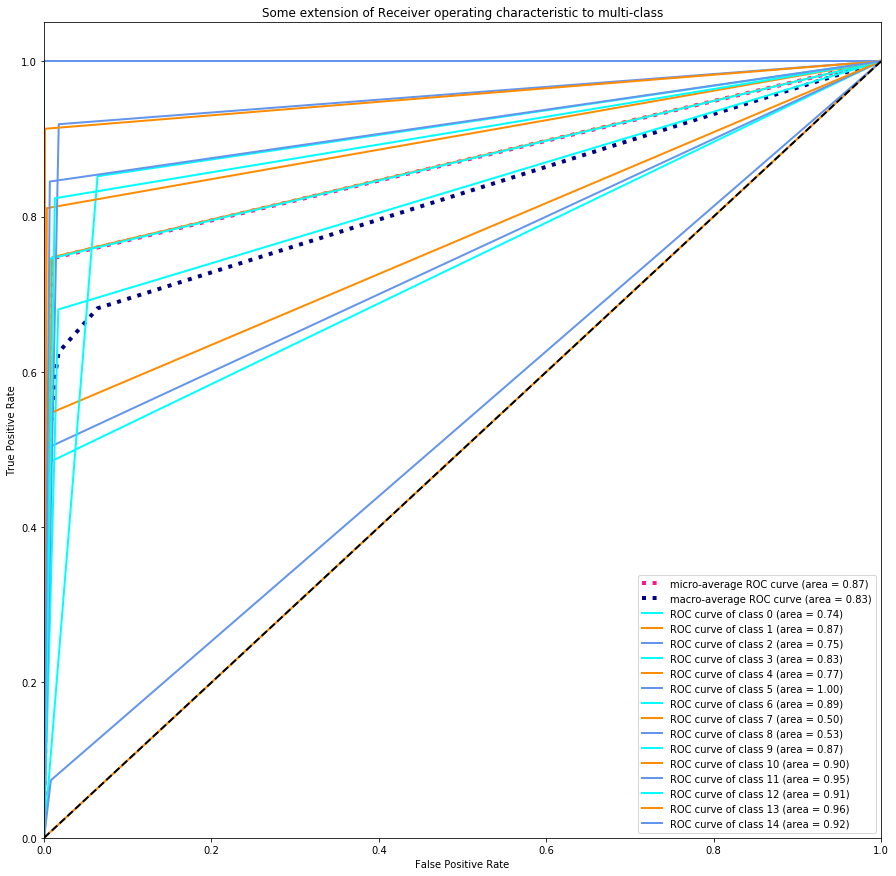

0

In [0]:
poltting_roc(y_test_curved_RNN, y_score_curved_RNN)

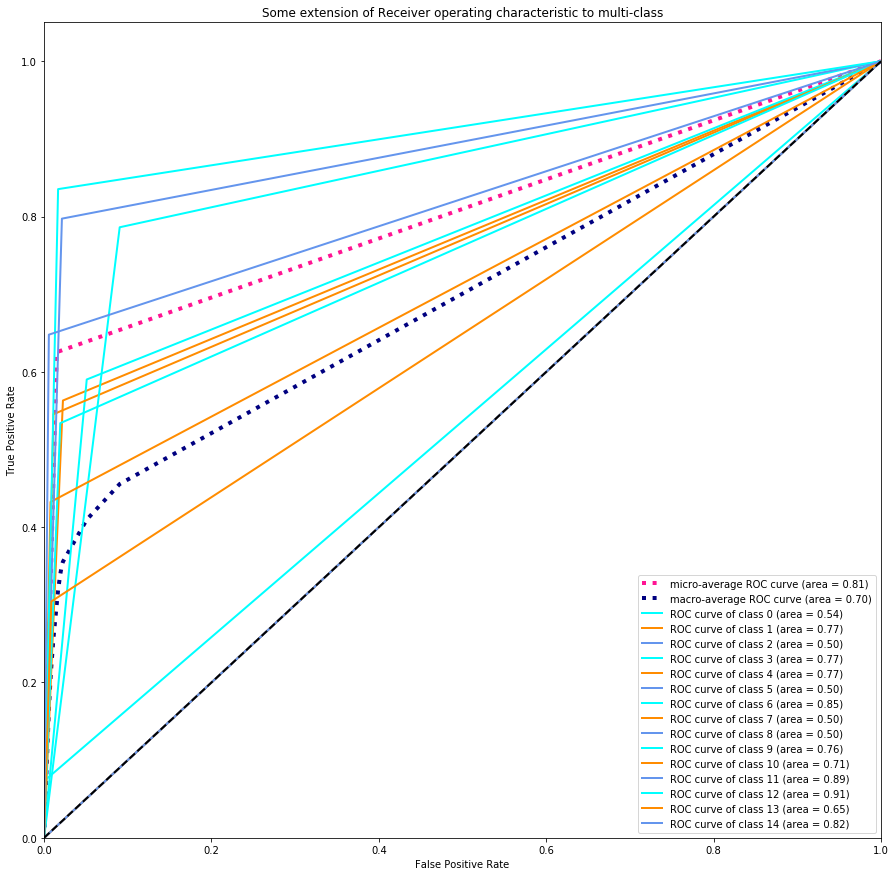

0

In [0]:
poltting_roc(y_test_curved_CNN, y_score_curved_CNN)